<IPython.core.display.Javascript object>


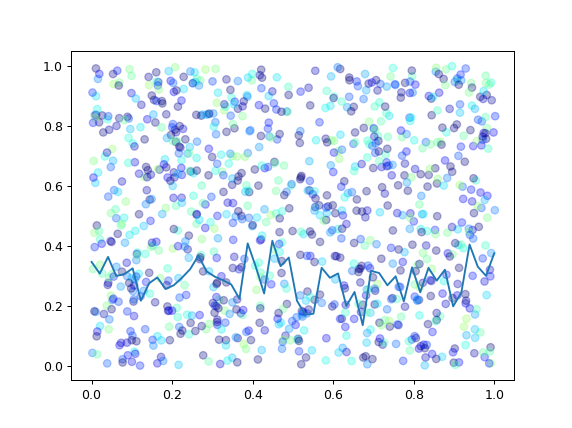

interactive(children=(SelectionSlider(description='x', index=50, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11…

interactive(children=(SelectionSlider(description='x', index=50, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11…

<function __main__.jitter(x)>

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim

import numpy as np
from scipy.stats import binned_statistic

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import Video

#Set an interactive backend
%matplotlib nbagg

xy=np.random.rand(2,1000) #create coordinates
c=np.random.rand(100,1000) #create values for colors

#Create scatter plot and save it to a variable
scat=plt.scatter(*xy,vmax=1.5,c=c[50,:],cmap='jet',alpha=0.3)

#Create line plot and save it to a variable
line,=plt.plot(np.linspace(0,1,50),binned_statistic(xy[0],scat.get_array(),bins=50)[0])

#Define functions for the interaction
def cambia_colores(x):
    scat.set_array(c[x,:]) #Changes the array use for colors
    scat.update_scalarmappable() #Update color transformation
    #Change de line data
    line.set_data(np.linspace(0,1,50),binned_statistic(xy[0],scat.get_array(),bins=50)[0]) 

    
def jitter(x):
    jit=0.02
    scat.set_offsets(xy.T+jit*np.random.rand(1000,2)-0.5*jit) #changes de scatterplot coordinates

#Create interactive slider widgets that call functions
interact(cambia_colores,x=widgets.SelectionSlider(options=list(range(100)),value=50))
interact(jitter,x=widgets.SelectionSlider(options=list(range(100)),value=50))

In [9]:
#No interaction, animates on a for a loop
for i in range(200):
    
    # Random up or downmultiplier
    if i%5==0:
        mult=1
        if (np.random.rand()-0.5)/0.5>0:
            mult=-1
            
    #Change scatter colors a litlle bit, randomly up or down        
    scat.set_array(scat.get_array()+mult*np.array([0.005]*1000)) 
    scat.update_scalarmappable()
    
    #Change line data coordinates    
    line.set_data(np.linspace(0,1,50),binned_statistic(xy[0],scat.get_array(),bins=50)[0])
    
    #Change scatter coordinates a little bit, randomly   
    jit=0.01
    scat.set_offsets(xy.T+jit*np.random.rand(1000,2)-0.5*jit)
    
    #UPDATE THE FIGURE! Won't work without this
    plt.gcf().canvas.draw()
    plt.gcf().canvas.flush_events()

In [32]:
#SAVE ANIMATiON TO A MP4 FILE

#Setup writer
FFMpegWriter = anim.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

with writer.saving(plt.gcf(), "animation_test.mp4", 50): #write to writer
    #SAME LOOP AS ABOVE, EXCEPT (*)
    for i in range(200):
        if i%5==0:
            mult=1
            if (np.random.rand()-0.5)/0.5>0:
                mult=-1    
        scat.set_array(scat.get_array()+mult*np.array([0.005]*1000))
        scat.update_scalarmappable()

        line.set_data(np.linspace(0,1,50),binned_statistic(xy[0],scat.get_array(),bins=50)[0])
        jit=0.01
        scat.set_offsets(xy.T+jit*np.random.rand(1000,2)-0.5*jit)
        plt.gcf().canvas.draw()
        plt.gcf().canvas.flush_events()
        writer.grab_frame() #(*) add current figure to the movie #Display Video inline
        
Video(("animation_test.mp4")) #Display Video inline

In [33]:
#SAVE ANIMATiON TO A GIF FILE (LOOP)

#Setup writer
FFMpegWriter = anim.PillowWriter
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!',loop=0)
writer = FFMpegWriter(fps=45,metadata=metadata)

with writer.saving(plt.gcf(), "animation_test.gif", 50): #write to writer
    #SAME LOOP AS ABOVE, EXCEPT (*)
    for i in range(200):
        if i%5==0:
            mult=1
            if (np.random.rand()-0.5)/0.5>0:
                mult=-1    
        scat.set_array(scat.get_array()+mult*np.array([0.005]*1000))
        scat.update_scalarmappable()

        line.set_data(np.linspace(0,1,50),binned_statistic(xy[0],scat.get_array(),bins=50)[0])
        jit=0.01
        scat.set_offsets(xy.T+jit*np.random.rand(1000,2)-0.5*jit)
        plt.gcf().canvas.draw()
        plt.gcf().canvas.flush_events()
        writer.grab_frame() #(*) add current figure to the movie #Display Video inline
        

In [ ]:
#To display animated gif wait untile image is saved then copy the next line unocommented in a markwdown cell
#<img src="animation_test.gif" width="750" align="center">

In [28]:
#Save MP4 and GIF at the Same Time
FFMpegWriter = anim.writers['ffmpeg']
pillowWriter = anim.PillowWriter
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)
writer2 = pillowWriter(fps=15, metadata=metadata)

with writer.saving(plt.gcf(), "anima.mp4", 50):
    with writer2.saving(plt.gcf(), "anima.gif", 50):#write to writer
    #SAME LOOP AS ABOVE, EXCEPT (*)
        for i in range(10):
                    if i%5==0:
                        mult=1
                    if (np.random.rand()-0.5)/0.5>0:
                        mult=-1    
                    scat.set_array(scat.get_array()+mult*np.array([0.005]*1000))
                    scat.update_scalarmappable()

                    line.set_data(np.linspace(0,1,50),binned_statistic(xy[0],scat.get_array(),bins=50)[0])
                    jit=0.01
                    scat.set_offsets(xy.T+jit*np.random.rand(1000,2)-0.5*jit)
                    plt.gcf().canvas.draw()
                    plt.gcf().canvas.flush_events()
                    
                    writer2.grab_frame()
                    writer.grab_frame()